In [42]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [20]:
insurance_data = pd.read_csv( r"D:\Coding\Machine Learning\dataset\insurance.csv")

In [21]:
#OHE region column
X = insurance_data.drop(columns =["charges"])
y = insurance_data['charges']

X = pd.get_dummies(X, columns=["region"], drop_first=True, dtype=int)

# encoding sex,smokeers column
X['sex'] = X['sex'].map({"female": 1, "male": 0})
X['smoker'] = X['smoker'].map({"yes": 1, "no": 0})

#add new interaction feature
X['age_smoker'] = X['age'] * X['smoker']
X['bmi_smoker'] = X['bmi'] * X['smoker']

In [22]:
#Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
#Lasso Regression model
alphas = [0.001, 0.1, 1, 2, 5, 10, 20, 30, 40, 50, 100]
mses = []
for a in alphas:
    lasso_model = Lasso(alpha=a)
    lasso_model.fit(X_train, y_train)

    #Predictions
    y_pred = lasso_model.predict(X_test)
    #Calc MSE
    mse = mean_squared_error(y_test, y_pred)
    print(f"MSE for alpha={a}: ", mse)
    mses.append(mse)

MSE for alpha=0.001:  20922599.871035974
MSE for alpha=0.1:  20921803.69843139
MSE for alpha=1:  20914832.635089148
MSE for alpha=2:  20908106.779954527
MSE for alpha=5:  20890881.000633504
MSE for alpha=10:  20872844.794796687
MSE for alpha=20:  20877828.53237883
MSE for alpha=30:  20937537.13393977
MSE for alpha=40:  21046489.293890774
MSE for alpha=50:  21196929.869608898
MSE for alpha=100:  22423172.68602322


<Axes: >

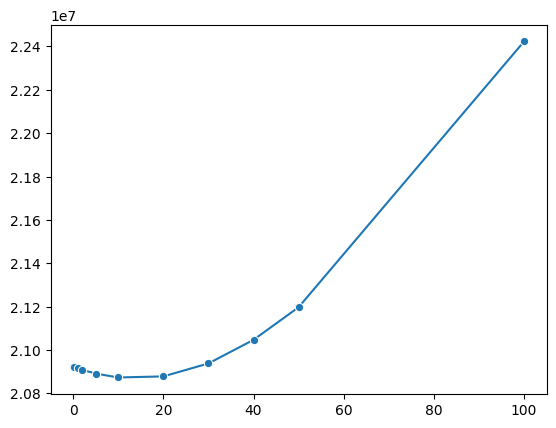

In [35]:
#plotting mse
sns.lineplot(x=alphas, y=mses, marker='o')

#### Using LassoCV or RidgeCV (Cross Validation)

In [39]:
a = [0.001, 0.1, 1, 2, 5, 10, 20, 30, 40, 50, 100]
#Lasso Model
lasso_cv_model = LassoCV(
    alphas = a,
    cv=5, #cv folds
    max_iter=1000,
    random_state=42
)

lasso_cv_model.fit(X_train, y_train)
print("Best Value of Alpha: ", lasso_cv_model.alpha_)


Best Value of Alpha:  0.001


In [44]:
#Predictions
y_pred = lasso_cv_model.predict(X_test)
#Calc MSE
mse = mean_squared_error(y_test, y_pred)
print("MSE: ", mse)
#r2 score
r2 = r2_score(y_test, y_pred)
print("R2 Score: ", r2)

MSE:  20922599.871035974
R2 Score:  0.8652317499151698
